In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
credito = pd.read_csv('Credit.csv')
credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,0<=X<200,30,'critical/other existing credit','new car',5234,<100,unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


In [4]:
previsores = credito.iloc[:,0:20].values
previsores[0]

array(['<0', 6, "'critical/other existing credit'", 'radio/tv', 1169,
       "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
       "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes', 'yes'],
      dtype=object)

In [5]:
classe = credito.iloc[:,20].values
classe

array(['good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'go

In [6]:
label = LabelEncoder()

In [7]:
previsores[:,0] = label.fit_transform(previsores[:,0])
previsores[:,2] = label.fit_transform(previsores[:,2])
previsores[:,3] = label.fit_transform(previsores[:,3])
previsores[:,5] = label.fit_transform(previsores[:,5])
previsores[:,6] = label.fit_transform(previsores[:,6])
previsores[:,8] = label.fit_transform(previsores[:,8])
previsores[:,9] = label.fit_transform(previsores[:,9])
previsores[:,11] = label.fit_transform(previsores[:,11])
previsores[:,13] = label.fit_transform(previsores[:,13])
previsores[:,14] = label.fit_transform(previsores[:,14])
previsores[:,16] = label.fit_transform(previsores[:,16])
previsores[:,18] = label.fit_transform(previsores[:,18])
previsores[:,19] = label.fit_transform(previsores[:,19])

In [8]:
previsores[0]

array([2, 6, 1, 7, 1169, 0, 3, 4, 3, 2, 4, 2, 67, 1, 1, 2, 3, 1, 1, 1],
      dtype=object)

In [9]:
X_treino, X_teste, y_treino, y_teste = train_test_split(previsores,
                                                       classe,
                                                       test_size = 0.3,
                                                       random_state = 0)

In [10]:
X_treino[0]

array([1, 24, 1, 6, 11938, 3, 0, 2, 3, 0, 3, 3, 39, 1, 1, 2, 0, 2, 1, 1],
      dtype=object)

In [60]:
y_teste

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'goo

In [11]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_treino, y_treino)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
prev = naive_bayes.predict(X_teste)
prev

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [13]:
confusao = confusion_matrix(y_teste, prev)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [14]:
taxa_acerto = accuracy_score(y_teste, prev)
taxa_acerto

0.71

In [15]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.29000000000000004

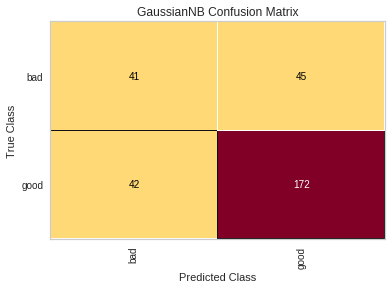

In [19]:
from yellowbrick.classifier import ConfusionMatrix
v = ConfusionMatrix(GaussianNB())
v.fit(X_treino, y_treino)
v.score(X_teste, y_teste)
v.poof()

In [20]:
novo_cred = pd.read_csv('NovoCredit.csv')
novo_cred

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [21]:
novo_cred = novo_cred.iloc[:,0:20].values

In [22]:
novo_cred

array([["'no checking'", 12, "'existing paid'", 'radio/tv', 804, '<100',
        '>=7', 4, "'male single'", 'none', 4, 'car', 38, 'none', 'own',
        1, 'skilled', 1, 'none', 'yes']], dtype=object)

In [23]:
novo_cred[:,0] = label.fit_transform(novo_cred[:,0])
novo_cred[:,2] = label.fit_transform(novo_cred[:,2])
novo_cred[:,3] = label.fit_transform(novo_cred[:,3])
novo_cred[:,5] = label.fit_transform(novo_cred[:,5])
novo_cred[:,6] = label.fit_transform(novo_cred[:,6])
novo_cred[:,8] = label.fit_transform(novo_cred[:,8])
novo_cred[:,9] = label.fit_transform(novo_cred[:,9])
novo_cred[:,11] = label.fit_transform(novo_cred[:,11])
novo_cred[:,13] = label.fit_transform(novo_cred[:,13])
novo_cred[:,14] = label.fit_transform(novo_cred[:,14])
novo_cred[:,16] = label.fit_transform(novo_cred[:,16])
novo_cred[:,18] = label.fit_transform(novo_cred[:,18])
novo_cred[:,19] = label.fit_transform(novo_cred[:,19])

In [24]:
novo_cred

array([[0, 12, 0, 0, 804, 0, 0, 4, 0, 0, 4, 0, 38, 0, 0, 1, 0, 1, 0, 0]],
      dtype=object)

In [25]:
naive_bayes.predict(novo_cred)

array(['good'], dtype='<U4')